# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Assignment/bank-full.csv')

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
Data.shape

(45211, 17)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# Checking Unique Values

In [ ]:
Data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [ ]:
for columns in Data.columns:
  print(columns)
  print("-"*50)
  print(Data[columns].value_counts())
  print("-"*50)

age
--------------------------------------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
--------------------------------------------------
job
--------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------
marital
--------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------
education
--------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: educatio

# Changing 'unknown' values to null values and dropping them


In [ ]:
# Changing 'unknown' values from 'job' & 'education' columns to null values
Data['job'] = Data['job'].replace('unknown', pd.NA)
Data['education'] = Data['education'].replace('unknown', pd.NA)

In [ ]:
Data.isnull().sum()

age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Target          0
dtype: int64

In [ ]:
Data.shape

(45211, 17)

In [ ]:
Data = Data.dropna(how='any',axis=0)

In [ ]:
Data.shape

(43193, 17)

# Removing unnecessory columns

In [ ]:
#Removing unnecessory columns
Data.drop(columns=['day','month','pdays','previous','poutcome'] , inplace=True)

<ipython-input-15-541ec0912283>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns=['day','month','pdays','previous','poutcome'] , inplace=True)


This has been performed to make the model relevant to the marketing attempts only

# Descriptive Analysis

In [ ]:
Data.describe()

,age,balance,duration,campaign
count,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,258.323409,2.758178
std,10.512640,3042.103625,258.162006,3.063987
min,18.000000,-8019.000000,0.000000,1.000000
25%,33.000000,71.000000,103.000000,1.000000
50%,39.000000,442.000000,180.000000,2.000000
75%,48.000000,1412.000000,318.000000,3.000000
max,95.000000,102127.000000,4918.000000,58.000000


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   loan       43193 non-null  object
 8   contact    43193 non-null  object
 9   duration   43193 non-null  int64 
 10  campaign   43193 non-null  int64 
 11  Target     43193 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.3+ MB


# Checking for outliers & Removing them

In [ ]:
Data['age'].unique()

array([58, 44, 33, 35, 28, 42, 43, 41, 29, 53, 57, 51, 60, 56, 32, 25, 40,
       39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 45, 47, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 19, 77, 86,
       95, 81, 18, 89, 84, 87, 88])

In [ ]:
Data['age'].describe()

count    43193.000000
mean        40.764082
std         10.512640
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Boxplot for age')

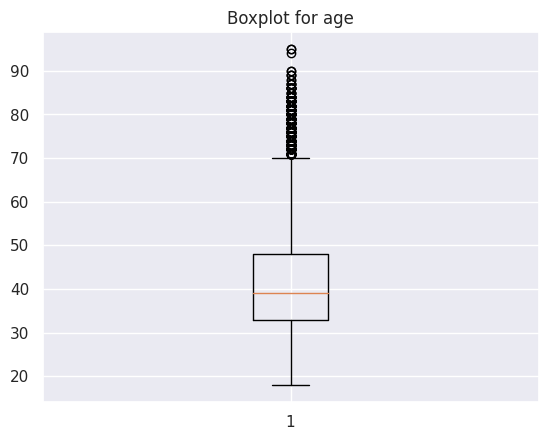

In [ ]:
plt.boxplot(Data['age'])
plt.title('Boxplot for age')

In [ ]:
Data['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [ ]:
Data['balance'].describe()

count     43193.000000
mean       1354.027342
std        3042.103625
min       -8019.000000
25%          71.000000
50%         442.000000
75%        1412.000000
max      102127.000000
Name: balance, dtype: float64

Text(0.5, 1.0, 'Boxplot for balance')

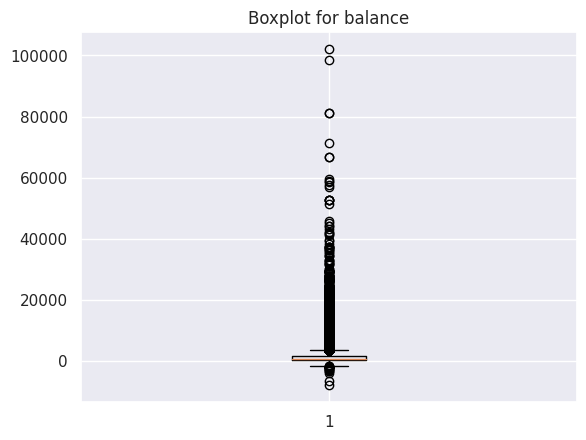

In [ ]:
plt.boxplot(Data['balance'])
plt.title('Boxplot for balance')

In [ ]:
Data['campaign'].unique()

array([ 1,  2,  3,  5,  4,  7,  8,  6,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 41, 26, 28, 55, 50, 38, 23, 20,
       29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
Data['campaign'].describe()

count    43193.000000
mean         2.758178
std          3.063987
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

Text(0.5, 1.0, 'Boxplot for campaign')

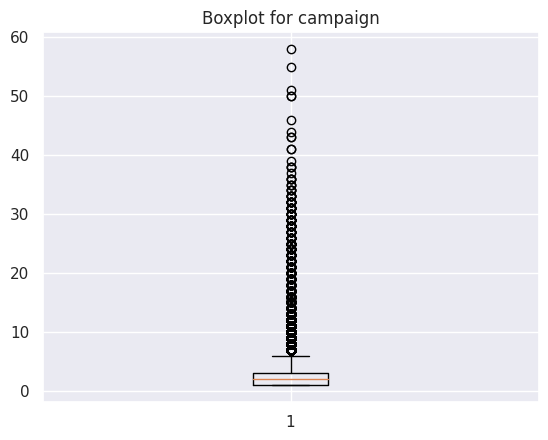

In [ ]:
plt.boxplot(Data['campaign'])
plt.title('Boxplot for campaign')

In [ ]:
Data['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
Data['duration'].describe()

count    43193.000000
mean       258.323409
std        258.162006
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

Text(0.5, 1.0, 'Boxplot for duration')

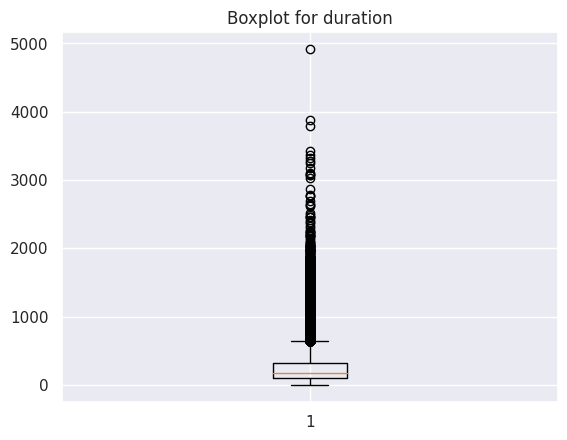

In [ ]:
plt.boxplot(Data['duration'])
plt.title('Boxplot for duration')

In [ ]:
columns_to_process = ['campaign', 'balance', 'duration', 'age']

for column in columns_to_process:
    Q1, Q3 = Data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Data = Data[(Data[column] >= Q1 - 1.5 * IQR) & (Data[column] <= Q3 + 1.5 * IQR)]

In [ ]:
Data.shape

(33266, 12)

In [ ]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'Target'],
      dtype='object')

In [ ]:
Data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,266,1,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,386,2,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,no


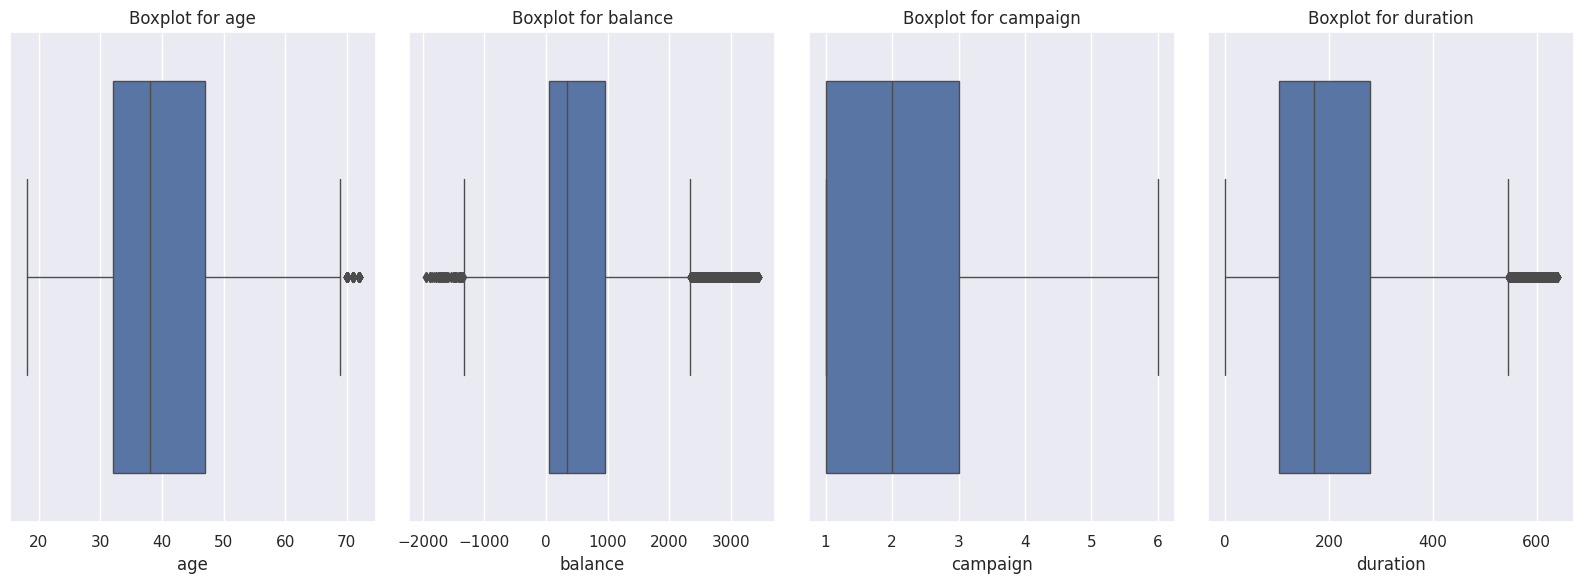

In [ ]:
features_to_plot = ['age', 'balance', 'campaign', 'duration']
fig, axes = plt.subplots(1, len(features_to_plot), figsize=(16, 6))

for i, feature in enumerate(features_to_plot):
    sb.boxplot(data=Data, x=feature, ax=axes[i],linewidth=1.0)
    axes[i].set_title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

Removed the outliers using the iqr method. Balance and Duration still appear to have some outliers. This will be modified only if our eventual model performance is not satisfying. Not doing the removal again at this moment to not lose more data.

In [ ]:
Data.shape

(33266, 12)

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,no


In [ ]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'Target'],
      dtype='object')

# Inferential Statistics

In [ ]:
sample_age = np.random.choice(a = Data['age'] , size=1500)
print('Sample mean for age: ' , sample_age.mean())
print('Population mean for age: ' , Data['age'].mean())

sample_balance = np.random.choice(a = Data['balance'] , size=1500)
print('Sample mean for balance: ' , sample_balance.mean())
print('Population mean for balance: ' , Data['balance'].mean())

sample_campaign = np.random.choice(a = Data['campaign'] , size=1500)
print('Sample mean for campaign: ' , sample_campaign.mean())
print('Population mean for campaign: ' , Data['campaign'].mean())

sample_duration = np.random.choice(a = Data['duration'] , size=1500)
print('Sample mean for duration: ' , sample_duration.mean())
print('Population mean for duration: ' , Data['duration'].mean())

Sample mean for age:  39.95733333333333
Population mean for age:  40.18947273492455
Sample mean for balance:  604.2193333333333
Population mean for balance:  630.7422293031924
Sample mean for campaign:  2.116
Population mean for campaign:  2.1360247700354718
Sample mean for duration:  205.47733333333332
Population mean for duration:  206.75434377442434


#Checking correlation

<ipython-input-39-594e90aeddbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


<Axes: >

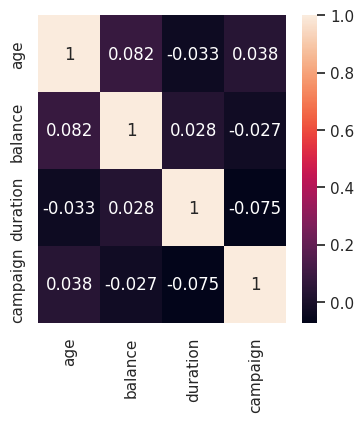

In [ ]:
plt.rcParams['figure.figsize'] = (4,4)
correlation = Data.corr()
sb.heatmap(correlation , xticklabels = correlation.columns , yticklabels = correlation.columns , annot = True)

# Grouping the data

In [ ]:
#Grouping by job and education
data_by_job_edu = Data.groupby(['job','education'])

# Accessing the groups
groups = data_by_job_edu.groups
print(groups)

# Iterating over the groups
for job, group_data in data_by_job_edu:
    print("Job:", job)
    print(group_data)
    print()

{('admin.', 'primary'): [45, 500, 903, 979, 989, 1085, 1097, 1222, 1258, 1775, 2150, 2206, 2694, 2924, 2995, 3078, 3378, 3451, 3478, 3659, 4639, 5651, 5735, 5827, 6094, 6115, 6295, 6826, 6920, 7026, 7084, 7107, 7258, 7297, 7385, 7466, 7729, 7760, 7885, 8016, 8304, 8511, 8635, 8684, 8704, 8859, 9018, 9281, 9293, 9317, 9544, 9636, 9716, 10000, 10110, 10186, 10634, 10637, 10743, 10806, 10878, 11958, 12239, 12836, 13396, 13552, 13695, 13834, 14062, 14112, 14266, 14454, 14810, 14855, 15062, 15202, 15234, 15378, 15450, 16273, 16407, 17124, 17200, 17540, 17944, 17996, 18190, 19040, 19140, 19865, 21485, 21597, 21604, 21940, 22497, 23100, 24078, 24291, 24453, 24717, ...], ('admin.', 'secondary'): [10, 11, 25, 32, 38, 39, 80, 92, 107, 116, 126, 131, 133, 165, 174, 175, 193, 200, 236, 238, 242, 250, 267, 274, 281, 285, 286, 301, 310, 315, 324, 336, 338, 352, 355, 363, 364, 366, 371, 373, 376, 393, 396, 397, 412, 413, 415, 422, 435, 439, 445, 456, 466, 478, 495, 509, 511, 522, 529, 534, 543, 545, 

In [ ]:
#For the output, printing the different marketing efforts
Data[['Target','campaign','duration']].groupby('Target').agg(['mean','median'])

 ('unemployed', 'primary')
       age         job   marital education default  balance housing loan  \
463     39  unemployed   married   primary      no      408     yes   no   
990     37  unemployed  divorced   primary      no      849     yes   no   
1155    38  unemployed   married   primary      no      447     yes   no   
1364    41  unemployed   married   primary     yes     -581     yes   no   
1521    38  unemployed   married   primary      no     1147     yes  yes   
...    ...         ...       ...       ...     ...      ...     ...  ...   
43835   55  unemployed   married   primary      no     1212      no   no   
44611   55  unemployed   married   primary      no     1212      no   no   
44616   62  unemployed   married   primary      no      532      no   no   
44988   27  unemployed    single   primary      no       93      no   no   
45089   57  unemployed  divorced   primary      no      282      no   no   

        contact  duration  campaign Target  
463     unknown

campaign           duration       
            mean median        mean median
Target                                    
no      2.167295    2.0  195.796964  162.0
yes     1.791622    1.0  327.435897  301.0

In [ ]:
#Grouping target based on job
grouped_data = Data.groupby(['job'])['Target'].value_counts()
print(grouped_data)

job            Target
admin.         no        3676
               yes        382
blue-collar    no        7034
               yes        304
entrepreneur   no        1036
               yes         53
housemaid      no         847
               yes         56
management     no        6090
               yes        723
retired        no        1167
               yes        216
self-employed  no        1049
               yes        100
services       no        3047
               yes        181
student        no         469
               yes        164
technician     no        5235
               yes        467
unemployed     no         847
               yes        123
Name: Target, dtype: int64


In [ ]:
#Grouping target based on education
grouped_data = Data.groupby(['education'])['Target'].value_counts()
print(grouped_data)

education  Target
primary    no         4914
           yes         218
secondary  no        16937
           yes        1379
tertiary   no         8646
           yes        1172
Name: Target, dtype: int64


In [ ]:
#Grouping target based on marital status
grouped_data = Data.groupby(['marital'])['Target'].value_counts()
print(grouped_data)

marital   Target
divorced  no         3630
          yes         296
married   no        18397
          yes        1389
single    no         8470
          yes        1084
Name: Target, dtype: int64


# Data Visualization

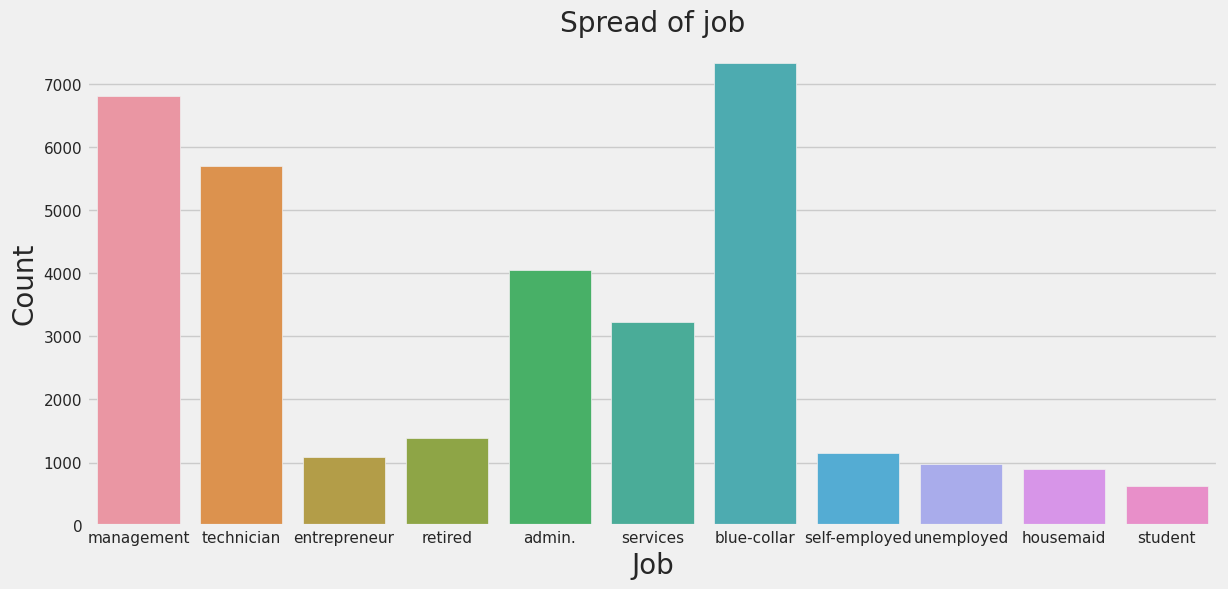

In [ ]:
#Visualizing number of people in different jobs

plt.rcParams['figure.figsize'] = (13,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=Data, x='job')
plt.title('Spread of job', fontweight=27)
plt.xlabel('Job', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.show()

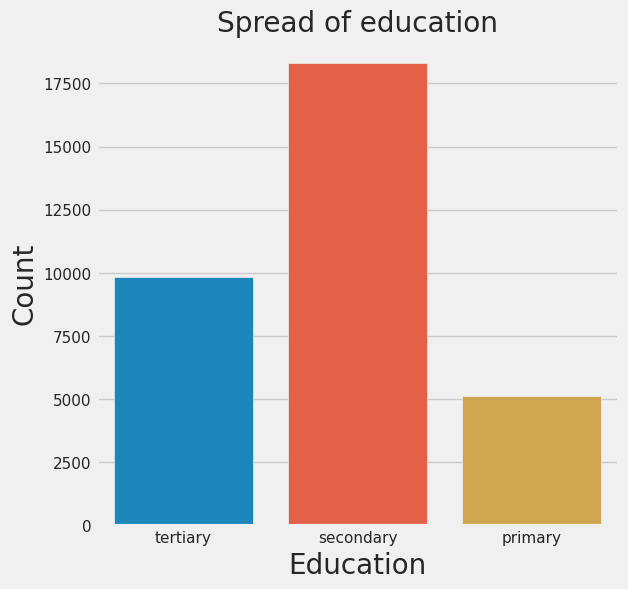

In [ ]:
#Visualizing number of people with different education

plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=Data, x='education')
plt.title('Spread of education', fontweight=27)
plt.xlabel('Education', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.show()

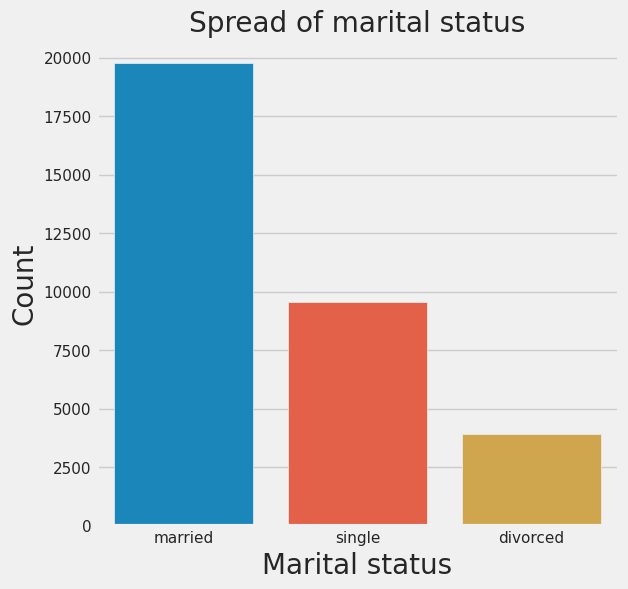

In [ ]:
#Visualizing number of people with different marital sttus.

sb.countplot(data=Data, x='marital')
plt.title('Spread of marital status', fontweight=27)
plt.xlabel('Marital status', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.show()

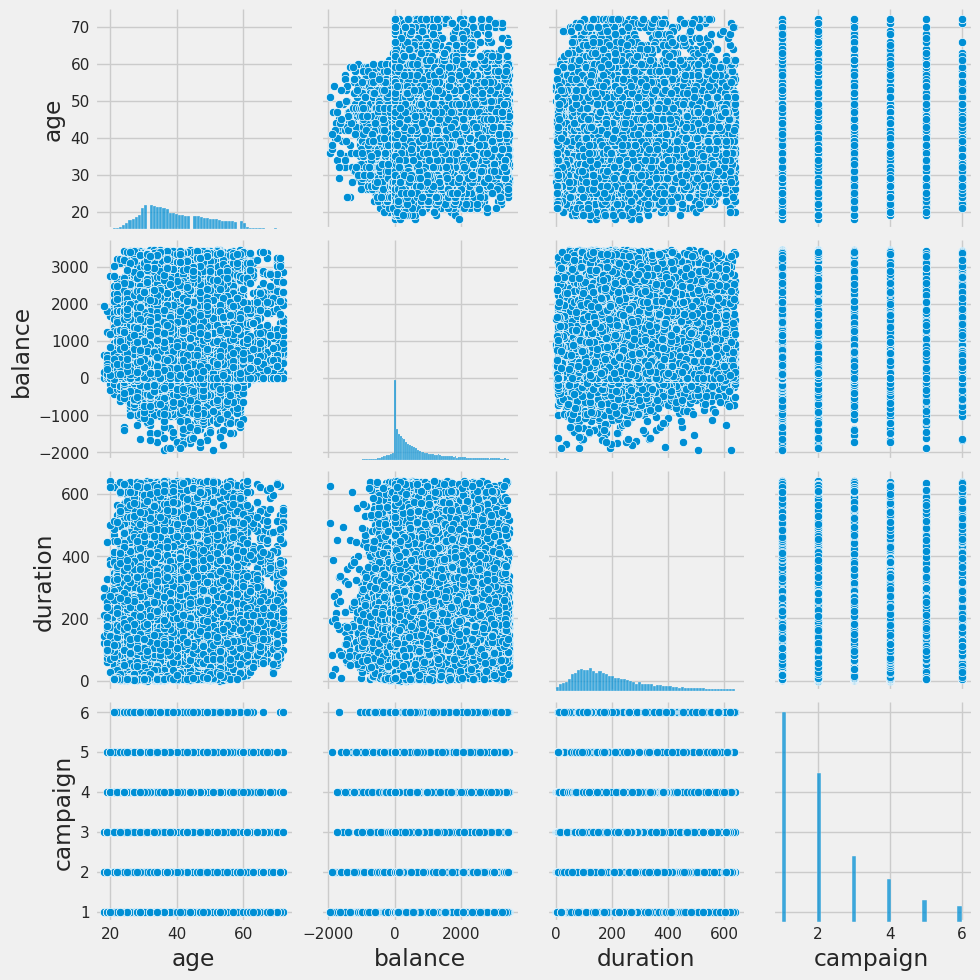

In [ ]:
#Visualizing each variables against each other.

sb.pairplot(Data)

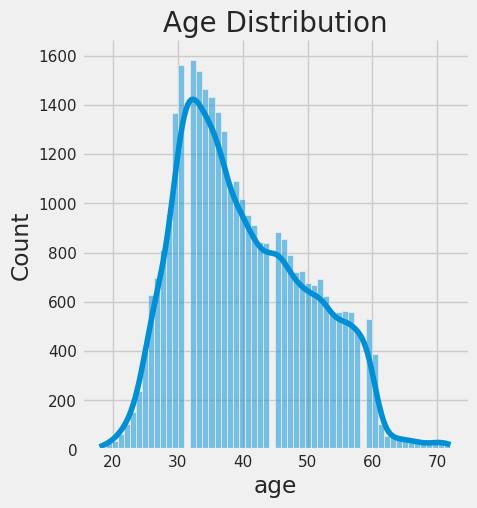

In [ ]:
sb.displot(Data['age'],kde=True)
plt.title('Age Distribution', fontsize=20)
plt.show()

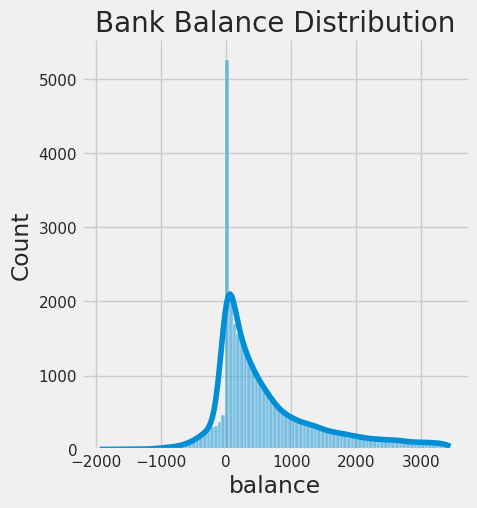

In [ ]:
sb.displot(Data['balance'],kde=True)
plt.title('Bank Balance Distribution', fontsize=20)
plt.show()

#Will be normalized after checking model performance.

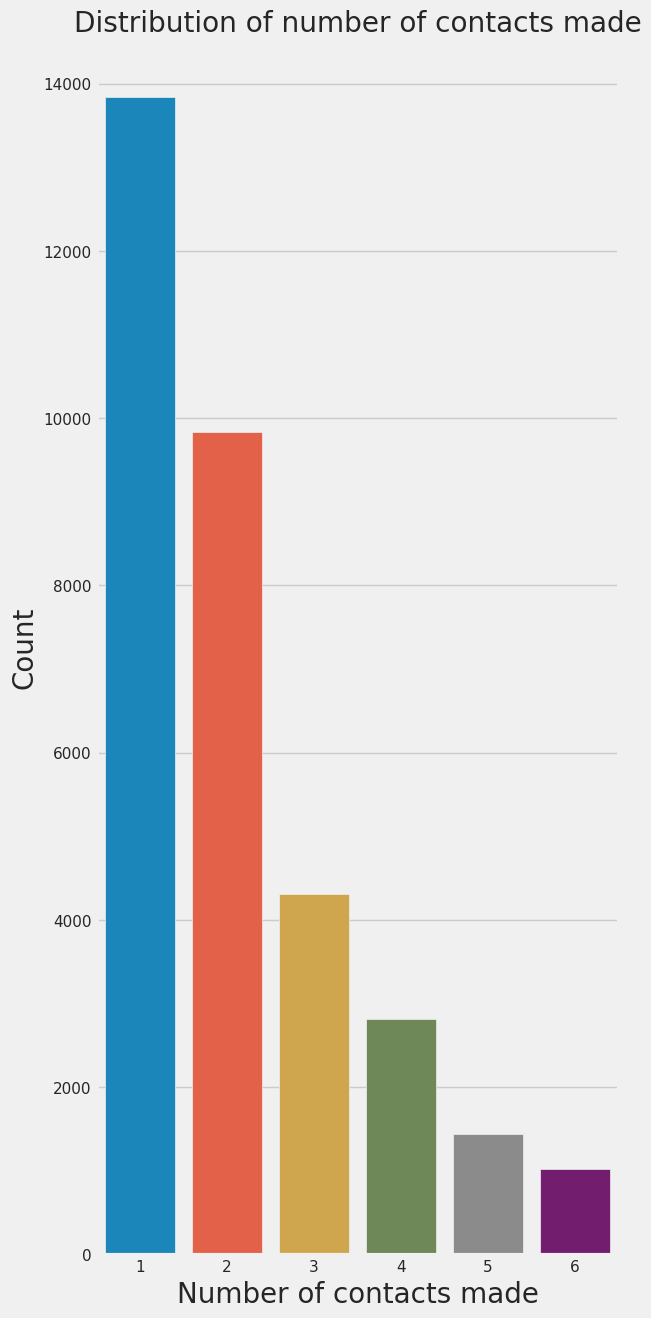

In [ ]:
plt.rcParams['figure.figsize'] = (6,15)
sb.countplot(data=Data, x='campaign')
plt.title('Distribution of number of contacts made', fontweight=27)
plt.xlabel('Number of contacts made', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.show()

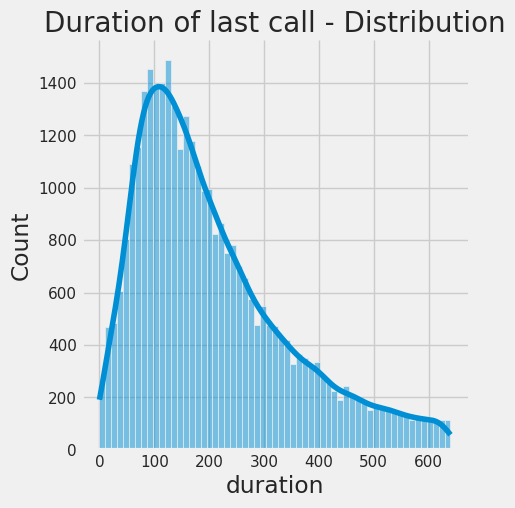

In [ ]:
sb.displot(Data['duration'],kde=True)
plt.title('Duration of last call - Distribution', fontsize=20)
plt.show()

#Will be normalized if needed.

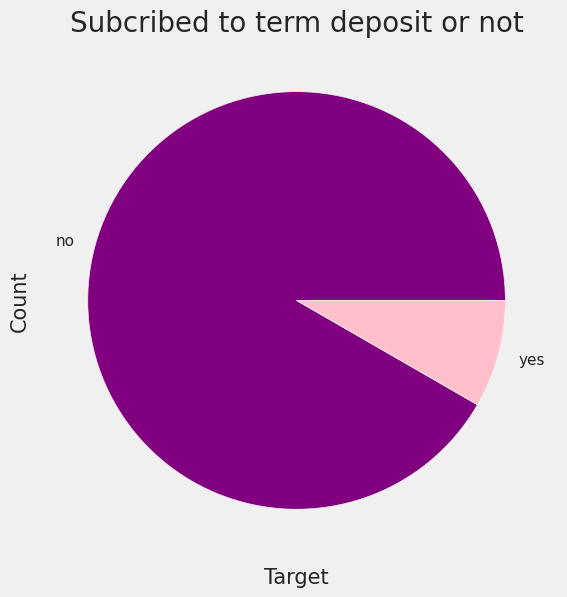

In [ ]:
Data['Target'].value_counts().plot.pie(colors=['purple','pink'])

plt.title('Subcribed to term deposit or not', fontweight=30, fontsize=20)
plt.xlabel('Target', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

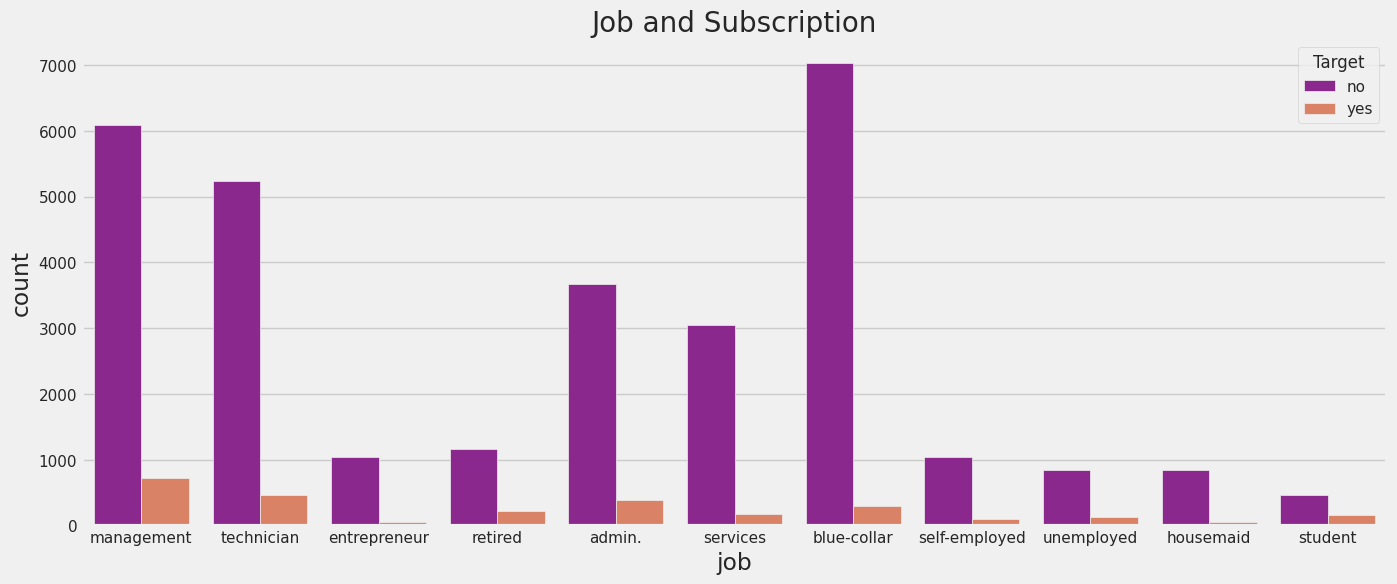

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)

sb.countplot(x=Data['job'], data=Data, hue=Data['Target'], palette='plasma')
plt.title('Job and Subscription', fontsize=20, fontweight=30)
plt.show()

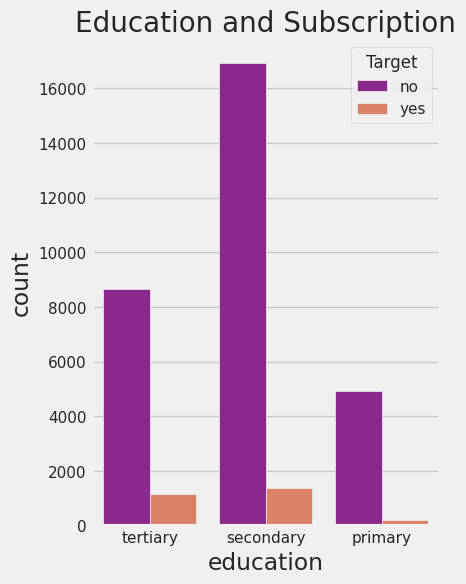

In [ ]:
plt.rcParams['figure.figsize'] = (4,6)

sb.countplot(x=Data['education'], data=Data, hue=Data['Target'], palette='plasma')
plt.title('Education and Subscription', fontsize=20, fontweight=30)
plt.show()

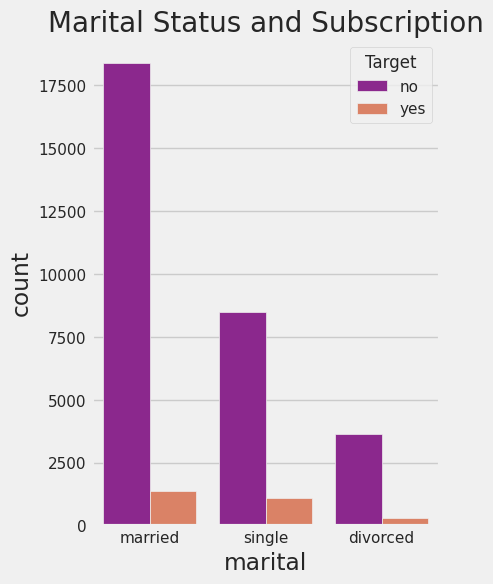

In [ ]:
plt.rcParams['figure.figsize'] = (4,6)

sb.countplot(x=Data['marital'], data=Data, hue=Data['Target'], palette='plasma')
plt.title('Marital Status and Subscription', fontsize=20, fontweight=30)
plt.show()

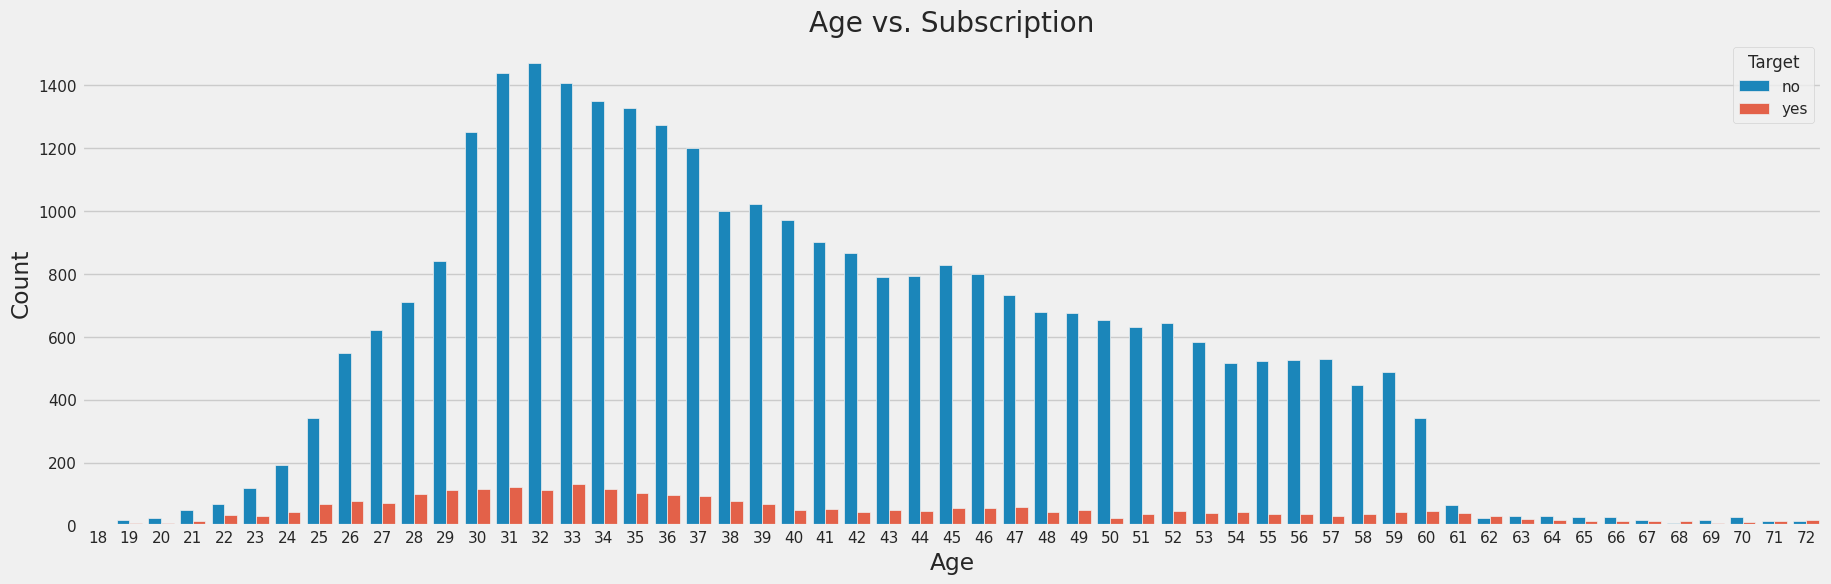

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,6)
sns.countplot(x='age', hue='Target', data=Data)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs. Subscription')

# Show the plot
plt.show()

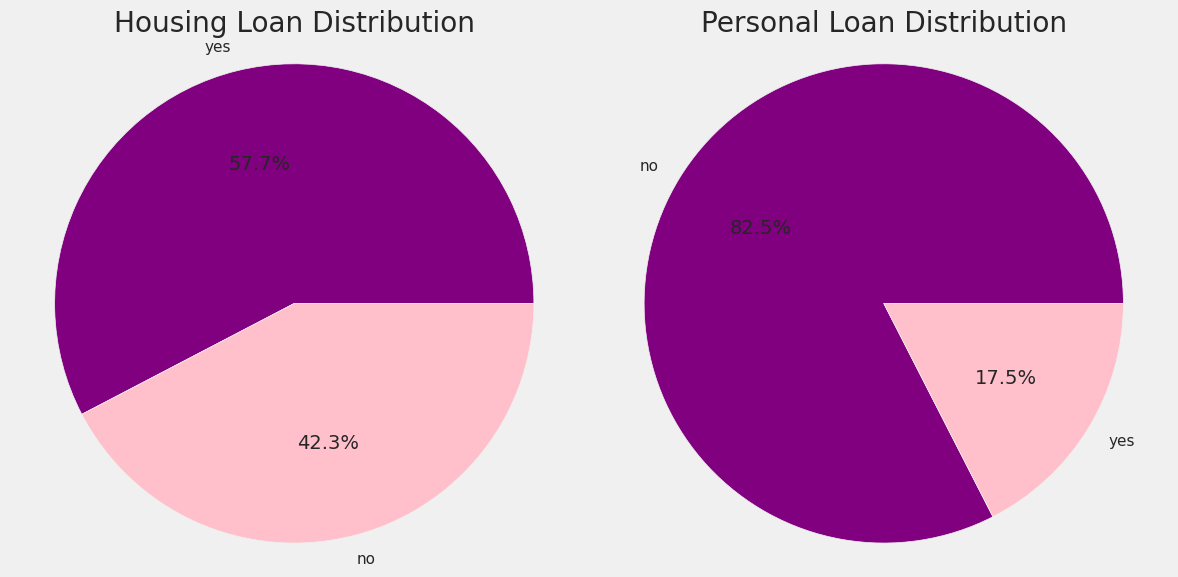

In [ ]:

housing_counts = Data['housing'].value_counts()
loan_counts = Data['loan'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['purple','pink']

axs[0].pie(housing_counts, labels=housing_counts.index, colors = colors,autopct='%1.1f%%')
axs[0].axis('equal')
axs[0].set_title('Housing Loan Distribution')

# Plot the 'loan' pie chart
axs[1].pie(loan_counts, labels=loan_counts.index, colors = colors,autopct='%1.1f%%')
axs[1].axis('equal')
axs[1].set_title('Personal Loan Distribution')

# Show the pie charts
plt.tight_layout()
plt.show()

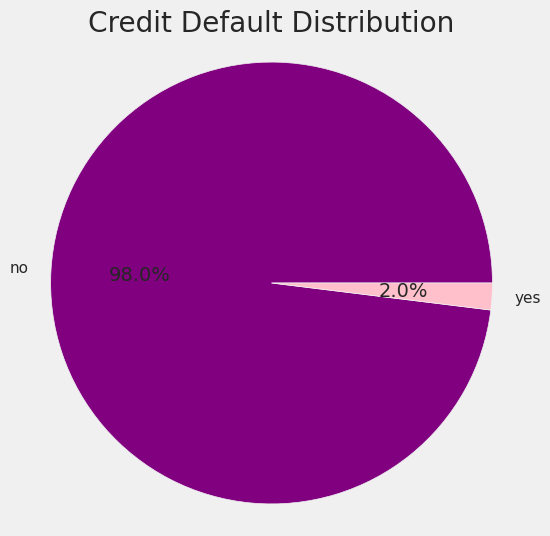

In [ ]:

default_counts = Data['default'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(default_counts, labels=default_counts.index, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Credit Default Distribution')

plt.show()

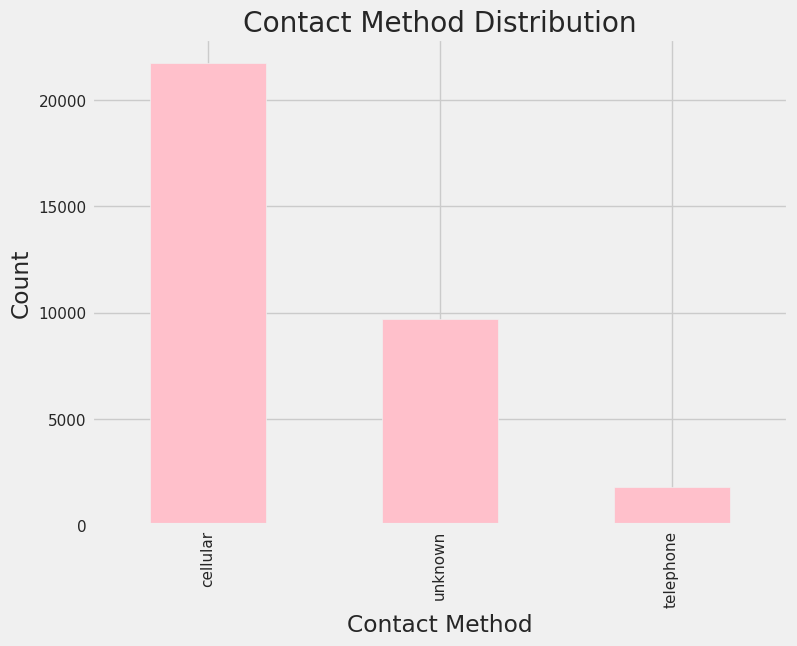

In [ ]:
contact_counts = Data['contact'].value_counts()

plt.figure(figsize=(8, 6))

contact_counts.plot(kind='bar', color='pink')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Contact Method Distribution')

plt.show()

In [ ]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'Target'],
      dtype='object')

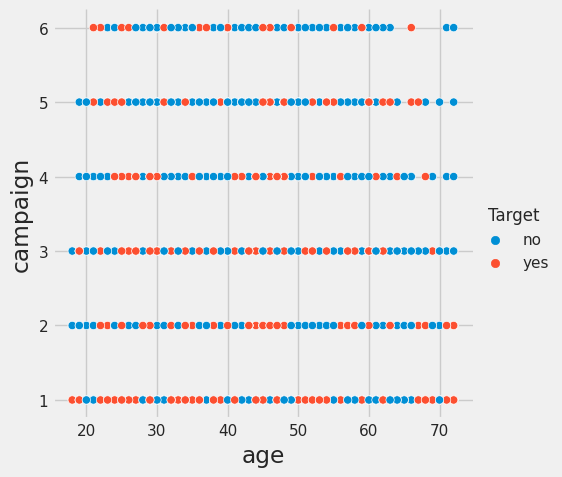

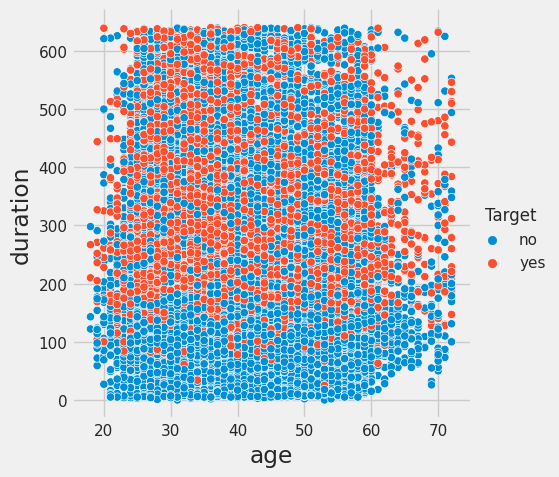

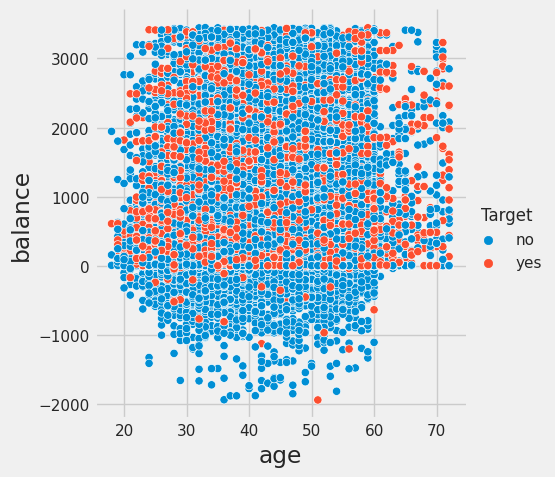

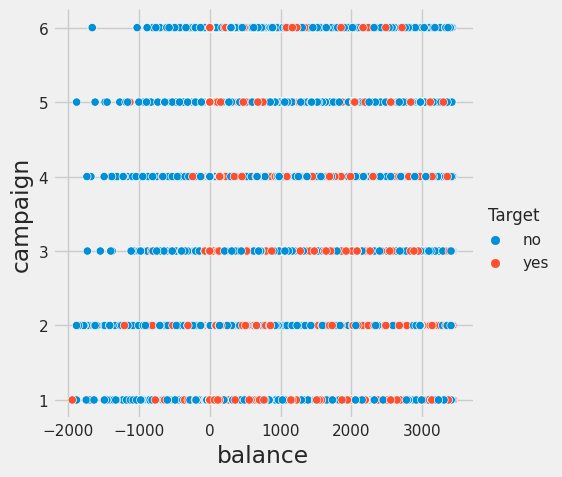

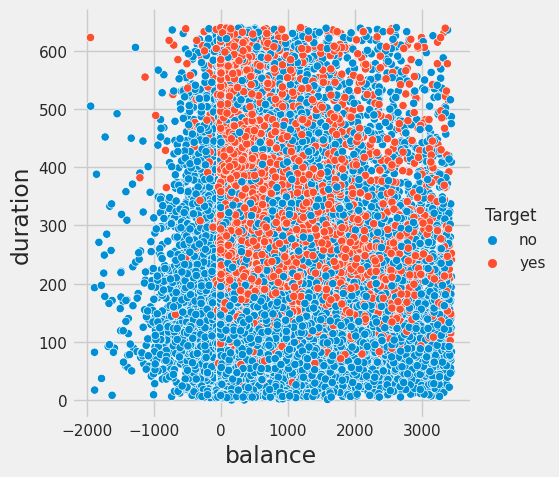

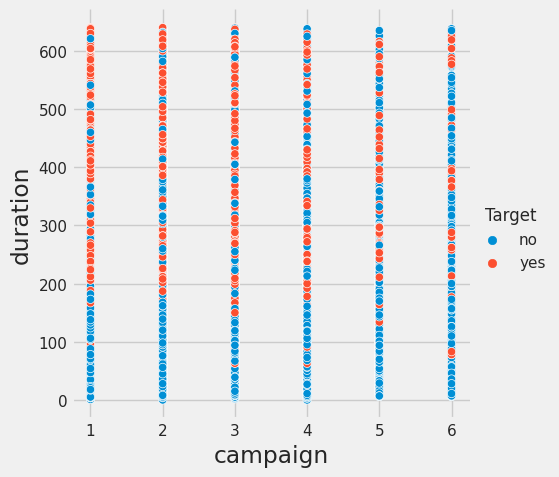

In [ ]:
#Analyzing the relationship between numerical variables differentiating with the subscription/target outcome.

sb.relplot(x='age' , y='campaign' , hue='Target' , data=Data)
sb.relplot(x='age' , y='duration' , hue='Target' , data=Data)
sb.relplot(x='age' , y='balance' , hue='Target' , data=Data)
sb.relplot(x='balance' , y='campaign' , hue='Target' , data=Data)
sb.relplot(x='balance' , y='duration' , hue='Target' , data=Data)
sb.relplot(x='campaign' , y='duration' , hue='Target' , data=Data)

# Categorical Variables in Numerical Representation

In [ ]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'Target'],
      dtype='object')

In [ ]:
Data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [ ]:
Data['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [ ]:
Data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
Data['Target'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,no


In [ ]:
data_encoded = pd.get_dummies(Data, columns=['job','education','marital','default','housing','loan','contact'])
print(data_encoded)

       age  balance  duration  campaign Target  job_admin.  job_blue-collar  \
0       58     2143       261         1     no           0                0   
1       44       29       151         1     no           0                0   
2       33        2        76         1     no           0                0   
5       35      231       139         1     no           0                0   
6       28      447       217         1     no           0                0   
...    ...      ...       ...       ...    ...         ...              ...   
45203   23      113       266         1    yes           0                0   
45205   25      505       386         2    yes           0                0   
45207   71     1729       456         2    yes           0                0   
45209   57      668       508         4     no           0                1   
45210   37     2971       361         2     no           0                0   

       job_entrepreneur  job_housemaid  job_managem

In [ ]:
data_encoded.shape

(33266, 31)

In [ ]:
#label encoding for Target/Subscription
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded['Target'] = le.fit_transform(data_encoded['Target'])

In [ ]:
data_encoded.shape

(33266, 31)

# Addressing Class Imbalance

In [ ]:
#pip install -U imbalanced-learn

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

X = data_encoded.drop('Target', axis=1)
y = data_encoded['Target']

print("Class distribution before oversampling:", Counter(y))

# Instantiate the SMOTE oversampler
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution before oversampling: Counter({0: 30497, 1: 2769})
Class distribution after oversampling: Counter({0: 30497, 1: 30497})


# Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

#x = data.drop(columns = ['Target']) #independent features
#y = data['Target'] #feature which we are predicting through the model

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size = 0.25, random_state = 365)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(45745, 30)
(45745,)
(15249, 30)
(15249,)



# Scaling the features

In [ ]:
#scaling the data to make it more model fit to avoid errors due to unordered data

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

#Logistic Regression Model


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


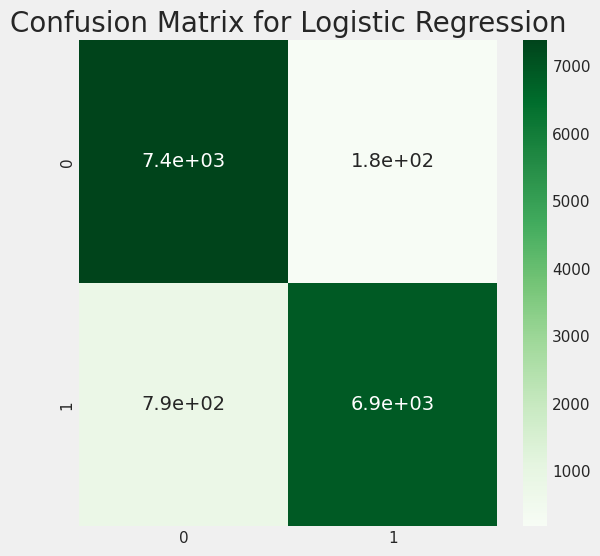

Training Accuracy:  0.9357744015739425
Testing Accuracy:  0.936126959144862

Classification Report  
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7568
           1       0.97      0.90      0.93      7681

    accuracy                           0.94     15249
   macro avg       0.94      0.94      0.94     15249
weighted avg       0.94      0.94      0.94     15249


Area Under Curve  
 0.9364179561714706


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

model = LogisticRegression()

#feeding the training data to the model
model.fit(x_train, y_train)

#predicting the test set results
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix

#creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

#calculating the classification accuracies
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

CR_RF = classification_report(y_test,y_pred)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, y_pred)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

#Printing the results
for measure in resultsRF:
  print (measure," \n",resultsRF[measure])

# Random Forest Model

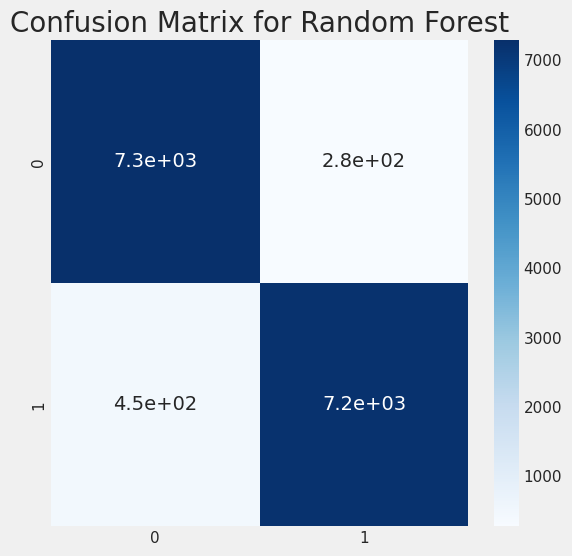


Classification Report  
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7568
           1       0.96      0.94      0.95      7681

    accuracy                           0.95     15249
   macro avg       0.95      0.95      0.95     15249
weighted avg       0.95      0.95      0.95     15249


Area Under Curve  
 0.9520778049017469


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Training the model
parametersRF = {'n_estimators':15, 'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(x_train, y_train)

#Predicting on test dataset
predictionsRF = RF.predict(x_test)

#Evaluating the model
cm = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

#printing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

#Printing the results
for measure in resultsRF:
  print (measure," \n",resultsRF[measure])

#Decision Tree Model

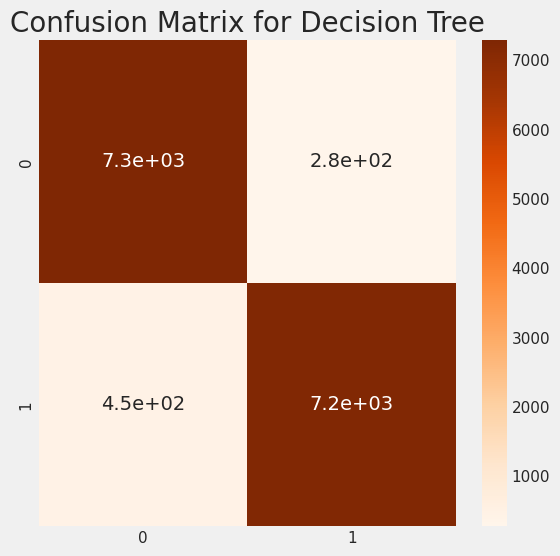


Classification Report  
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7568
           1       0.92      0.93      0.93      7681

    accuracy                           0.92     15249
   macro avg       0.92      0.92      0.92     15249
weighted avg       0.92      0.92      0.92     15249


Area Under Curve  
 0.9244430843466745


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Training the model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(x_train, y_train)

#Predicting on test dataset
predictionsDT = DT.predict(x_test)

#Evaluating the model
CM = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

#printing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(cm, annot = True, cmap = 'Oranges')
plt.title('Confusion Matrix for Decision Tree', fontweight = 30, fontsize = 20)
plt.show()

resultsDT = {"\nClassification Report":CR_DT,"\nArea Under Curve":AUC_DT}

#Printing the results
for measure in resultsDT:
  print (measure," \n",resultsDT[measure])

# Predicting new data

In [ ]:
data_encoded.columns

Index(['age', 'balance', 'duration', 'campaign', 'Target', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_primary',
       'education_secondary', 'education_tertiary', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown'],
      dtype='object')

In [ ]:
data_encoded.head()

,age,balance,duration,campaign,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,2143,261,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
1,44,29,151,1,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
2,33,2,76,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
5,35,231,139,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
6,28,447,217,1,0,0,0,0,0,1,...,1,1,0,0,1,0,1,0,0,1


In [ ]:
# Hypothetical new data point
new_data_original = pd.DataFrame({
    'age': [40],
    'balance': [1500],
    'duration': [300],
    'campaign': [3],
    'job': ['blue-collar'],
    'default': ['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular']
})

# Applying one-hot encoding consistently with the training data and ensuring feature names match
new_data_encoded = pd.get_dummies(new_data_original, columns=['job', 'default', 'housing', 'loan', 'contact'])
new_data_encoded = new_data_encoded.reindex(columns=x_train.columns, fill_value=0)

# Scaling new data
scaler = MinMaxScaler()
new_data_scaled = scaler.transform(new_data_encoded)

# Predict using the RandomForest model
prediction = RF.predict(new_data_scaled)
print("Predicted Class:", prediction[0])

if prediction[0] == 1:
    print("The model predicts that the user will subscribe to a term deposit.")

Predicted Class: 1
The model predicts that the user will subscribe to a term deposit.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Prompting user input
age = int(input("Enter age: "))
balance = int(input("Enter bank balance (Eur): "))
duration = int(input("Enter duration of last call (Seconds): "))
campaign = int(input("Enter number of contacts during this campaign: "))
job = input("Enter job: ")
default = input("Enter whether credit is in default (yes or no): ")
housing = input("Enter whether customer has taken housing loan (yes or no): ")
loan = input("Enter whether customer has taken personal loan (yes or no): ")
contact = input("Enter contact: ")

# Creating DataFrame
new_data_original = pd.DataFrame({
    'age': [age],
    'balance': [balance],
    'duration': [duration],
    'campaign': [campaign],
    'job': [job],
    'default': [default],
    'housing': [housing],
    'loan': [loan],
    'contact': [contact]
})

# Applying one-hot encoding consistently with the training data and ensuring feature names match
new_data_encoded = pd.get_dummies(new_data_original, columns=['job', 'default', 'housing', 'loan', 'contact'])
new_data_encoded = new_data_encoded.reindex(columns=x_train.columns, fill_value=0)

# Scaling new data
new_data_scaled = mm.transform(new_data_encoded)

# Predict using the RandomForest model
prediction = RF.predict(new_data_scaled)
print("Predicted Class:", prediction[0])

if prediction[0] == 1:
    print("The model predicts that the user will subscribe to a term deposit.")
else:
    print("The model predicts that the user will not subscribe to a term deposit.")